### Importación de datos



# Introduccion


En el desafío Alura Store, análisis de ventas y rendimiento de las tiendas, el objetivo es ayudar al señor Juan a decidir qué tienda debe vender para invertir en un nuevo negocio. Para ello, evaluaré cuál de las cuatro tiendas tiene un desempeño menor, permitiendo al señor Juan tomar la decisión de cuál sucursal debe vender para invertir en un nuevo negocio.

# Análisis

## Importación de datos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


## Análisis de facturación



Primero, calcularemos el total de ventas de cada tienda, y mostraremos los resultados en una tabla comparativa y una gráfica. La tienda 4 es la que cuenta con menos ventas totales. La tienda 1 es la de mayor venta.

     Tienda   Suma Precio
0  tienda_1  1.150880e+09
1  tienda_2  1.116344e+09
2  tienda_3  1.098020e+09
3  tienda_4  1.038376e+09




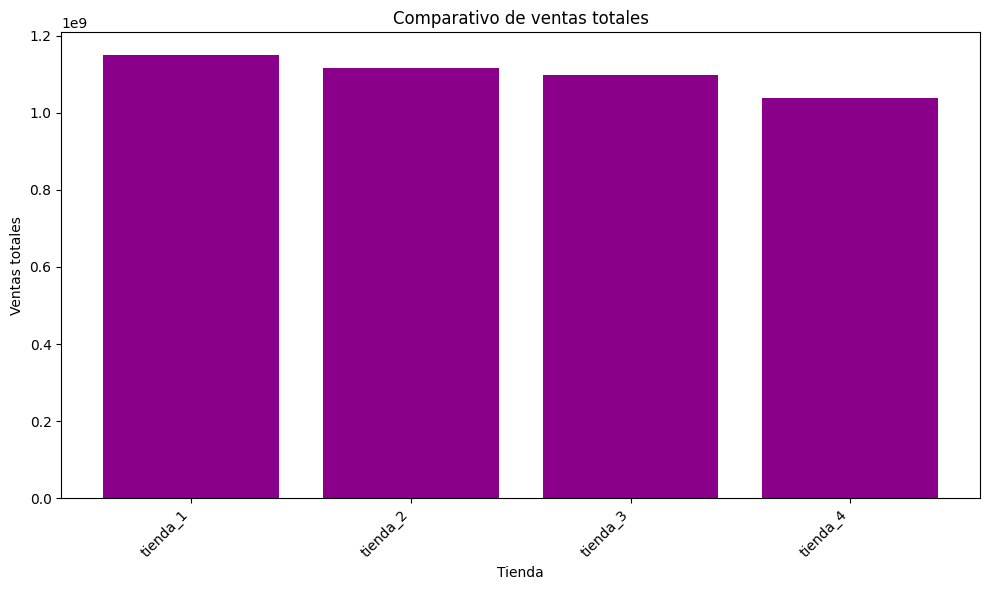

In [ ]:
resultados = []

# Sumar la columna 'Precio' para cada tienda
for tienda, nombre in zip([tienda, tienda2, tienda3, tienda4], ['tienda_1', 'tienda_2', 'tienda_3', 'tienda_4']):
  suma_precio = tienda['Precio'].sum()
  resultados.append({'Tienda': nombre, 'Suma Precio': suma_precio})

# Crear un DataFrame con los resultados
df_resultados = pd.DataFrame(resultados)

print(df_resultados)
print('\n')
# Graficar comparativo de ventas

plt.figure(figsize=(10, 6))
plt.bar(df_resultados['Tienda'], df_resultados['Suma Precio'], color='darkmagenta')
plt.xlabel('Tienda')
plt.ylabel('Ventas totales')
plt.title(f'Comparativo de ventas totales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Ventas por categoría

Después, calcularemos el total de ventas por producto de cada tienda, y mostraremos los resultados en cuatro tablas. Podemos observar que las cuatro tiendas venden los artículos en orden similar.

In [ ]:
# Iterar sobre cada URL y generar una tabla para cada tienda
for tienda, nombre in zip([tienda, tienda2, tienda3, tienda4], ['tienda_1', 'tienda_2', 'tienda_3', 'tienda_4']):
  df = pd.read_csv(url)
  suma_por_producto = tienda.groupby('Categoría del Producto')['Precio'].sum().reset_index().sort_values(by='Precio', ascending=False)

  print(f'Tabla generada para {nombre}:')
  print(suma_por_producto)
  print('\n')



Tabla generada para tienda_1:
    Categoría del Producto       Precio
3             Electrónicos  409476100.0
2        Electrodomésticos  283260200.0
7                  Muebles  192528900.0
4   Instrumentos musicales   75102400.0
1     Deportes y diversión   33350100.0
5                 Juguetes   20262200.0
0  Artículos para el hogar   15074500.0
6                   Libros    9321300.0


Tabla generada para tienda_2:
    Categoría del Producto       Precio
3             Electrónicos  410831100.0
2        Electrodomésticos  348567800.0
7                  Muebles  176426300.0
4   Instrumentos musicales  104990300.0
1     Deportes y diversión   34744500.0
5                 Juguetes   15945400.0
0  Artículos para el hogar   14746900.0
6                   Libros   10091200.0


Tabla generada para tienda_3:
    Categoría del Producto       Precio
3             Electrónicos  410775800.0
2        Electrodomésticos  329237900.0
7                  Muebles  201072100.0
4   Instrumentos musicales

## Calificación promedio de la tienda

Un factor importante a considerar es la satisffacción del cliente por tienda. En la tabla comparativa y la gráfica vemos que las tiendas con mejor calificación promedio son la 2 y la 3.




     Tienda  Calificacion Promedio
2  tienda_3               4.048326
1  tienda_2               4.037304
0  tienda_1               3.995759
3  tienda_4               3.995759


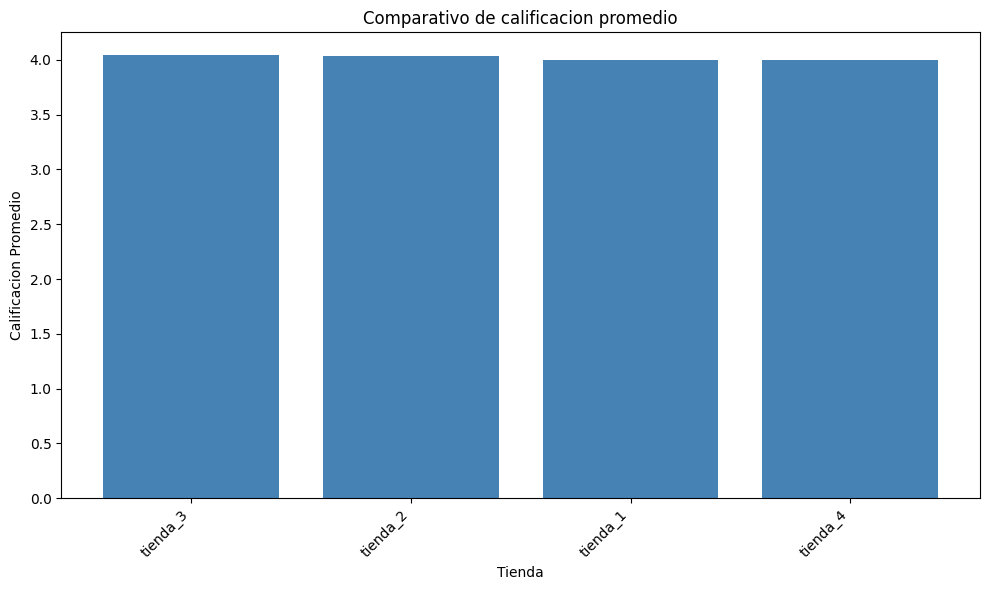

In [ ]:

# Inicializar una lista para almacenar los resultados
calificaciones_promedio = []

# Iterar sobre cada URL y calcular la calificación promedio
for tienda, nombre in zip([tienda, tienda2, tienda3, tienda4], ['tienda_1', 'tienda_2', 'tienda_3', 'tienda_4']):
  df = pd.read_csv(url)
  calificacion_promedio = tienda['Calificación'].mean()
  calificaciones_promedio.append({'Tienda': nombre, 'Calificacion Promedio': calificacion_promedio})

# Crear un DataFrame con los resultados
df_calificaciones_promedio = pd.DataFrame(calificaciones_promedio).sort_values(by='Calificacion Promedio', ascending=False)

print(df_calificaciones_promedio)

# Graficar comparativo de ventas

plt.figure(figsize=(10, 6))
plt.bar(df_calificaciones_promedio['Tienda'], df_calificaciones_promedio['Calificacion Promedio'], color='steelblue')
plt.xlabel('Tienda')
plt.ylabel('Calificacion Promedio')
plt.title(f'Comparativo de calificacion promedio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Productos más y menos vendidos
Se muestran los 5 productos más vendidos de cada tienda. Notamos que en las cuatro tiendas la mayoría de los productos top son electrónicos, en los primeros puestos, y electrodomésticos, en posiciones secundarias. Es de recalcar que solo la tienda 3 tiene como producto más vendido al refirgerador.

Los 5 productos más vendidos en tienda_1:
        Producto      Precio
0      Iphone 15  96697500.0
1  TV LED UHD 4K  90295300.0
2       Smart TV  82790400.0
3   Refrigerador  75271900.0
4    Tablet ABXY  56723100.0


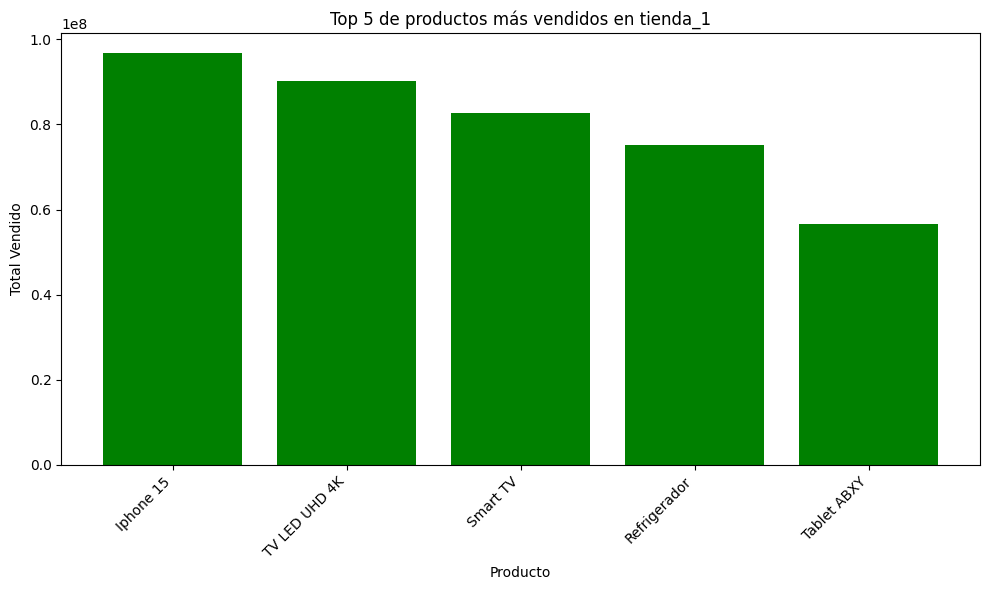



Los 5 productos más vendidos en tienda_2:
           Producto       Precio
0         Iphone 15  113225800.0
1     TV LED UHD 4K  103375000.0
2      Refrigerador   97632500.0
3  Lavadora de ropa   66762300.0
4          Smart TV   61142000.0


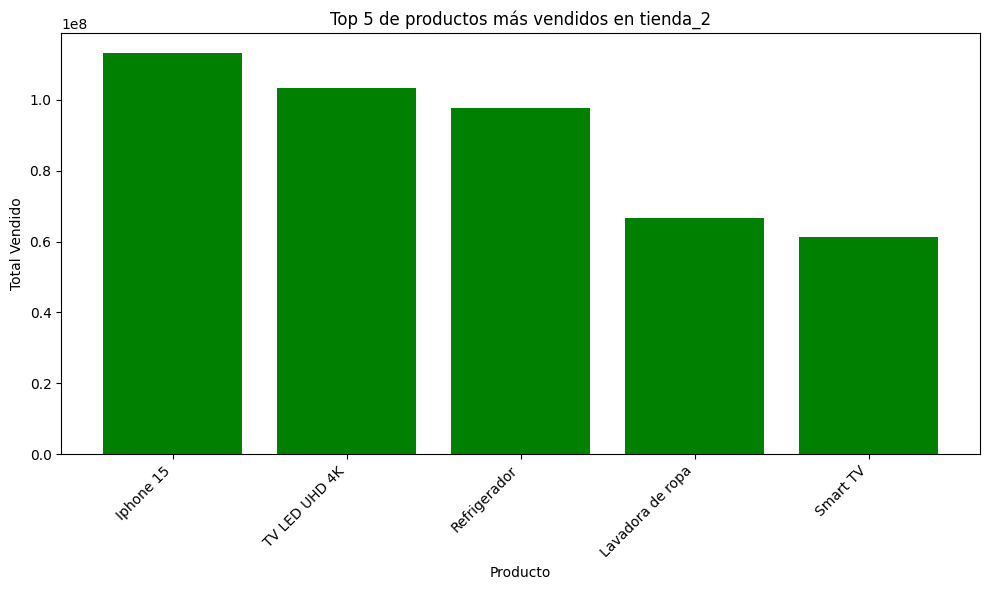



Los 5 productos más vendidos en tienda_3:
        Producto      Precio
0   Refrigerador  99889700.0
1  TV LED UHD 4K  96669100.0
2      Iphone 15  93225700.0
3       Smart TV  78837300.0
4   Lavavajillas  64364800.0


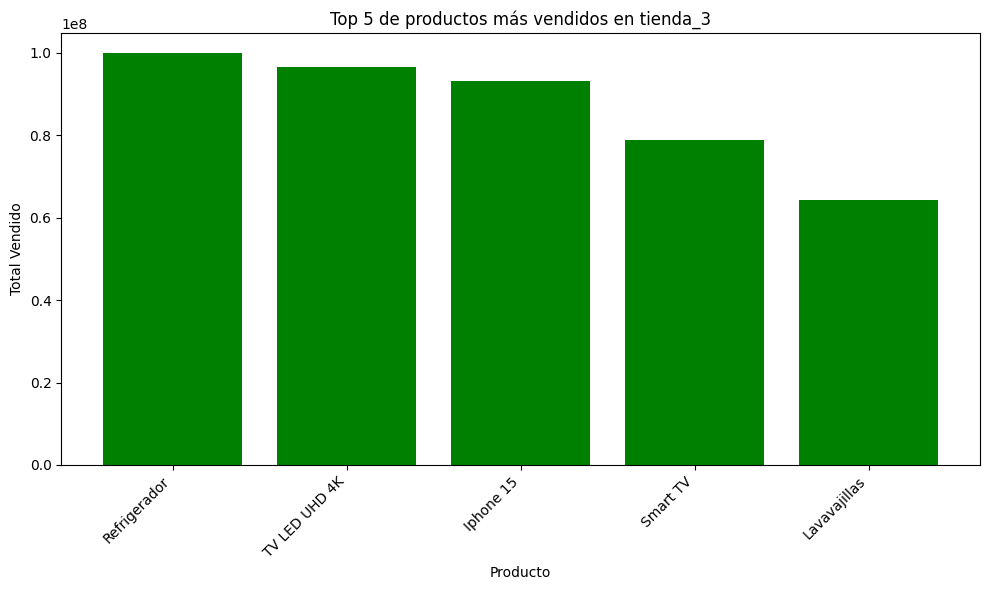



Los 5 productos más vendidos en tienda_4:
        Producto      Precio
0      Iphone 15  96697500.0
1  TV LED UHD 4K  90295300.0
2       Smart TV  82790400.0
3   Refrigerador  75271900.0
4    Tablet ABXY  56723100.0


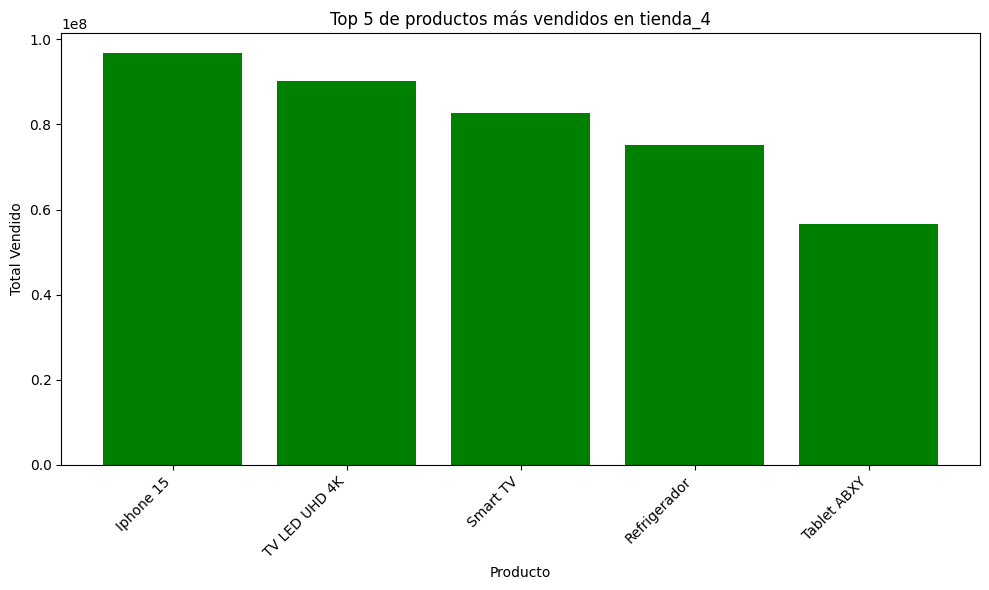

In [ ]:
# Generar tablas y gráficas con los 5 articulos mas vendidos de cada tienda

# Iterar sobre cada URL y encontrar los 5 productos más vendidos
for tienda, nombre in zip([tienda, tienda2, tienda3, tienda4], ['tienda_1', 'tienda_2', 'tienda_3', 'tienda_4']):
    df = pd.read_csv(url)
    top_5_productos = tienda.groupby('Producto')['Precio'].sum().nlargest(5).reset_index()
    print(f"Los 5 productos más vendidos en {nombre}:")
    print(top_5_productos)
# Graficar los 5 productos más vendidos

    plt.figure(figsize=(10, 6))
    plt.bar(top_5_productos['Producto'], top_5_productos['Precio'], color='green')
    plt.xlabel('Producto')
    plt.ylabel('Total Vendido')
    plt.title(f'Top 5 de productos más vendidos en {nombre}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    print('\n')


Con los datos anteriores, podemos calcular qué porcentaje de las ventas totales representa el grupo de los 5 productos más vendidos en cada tienda.
Observamos que en las tiendas 2 y 3 los productos top representan mayor porcentaje de las ventas totales, la diferencia con las tiendas 1 y 4 en este rubro es de alrededor de 1 punto porcentual.

In [ ]:
#Porcentaje de ventas de los top 5 productos

for tienda, nombre in zip([tienda, tienda2, tienda3, tienda4], ['tienda_1', 'tienda_2', 'tienda_3', 'tienda_4']):
    ventas_totales = tienda['Precio'].sum()
    top_5_productos = tienda.groupby('Producto')['Precio'].sum().nlargest(5)
    ventas_top_5 = top_5_productos.sum()
    porcentaje_top_5 = (ventas_top_5 / ventas_totales) * 100
    print(f"En {nombre}, el top 5 de productos representa el {porcentaje_top_5:.2f}% de las ventas totales.")


En tienda_1, el top 5 de productos representa el 38.69% de las ventas totales.
En tienda_2, el top 5 de productos representa el 39.61% de las ventas totales.
En tienda_3, el top 5 de productos representa el 39.43% de las ventas totales.
En tienda_4, el top 5 de productos representa el 38.69% de las ventas totales.


Ahora comparemos los cinco productos menos vendidos de cada tienda.

Los 5 productos menos vendidos en tienda_1:
             Producto     Precio
0  Cuerda para saltar   704800.0
1     Cubo mágico 8x8   748400.0
2      Dinosaurio Rex   858100.0
3   Ajedrez de madera  1075500.0
4        Set de vasos  1471800.0


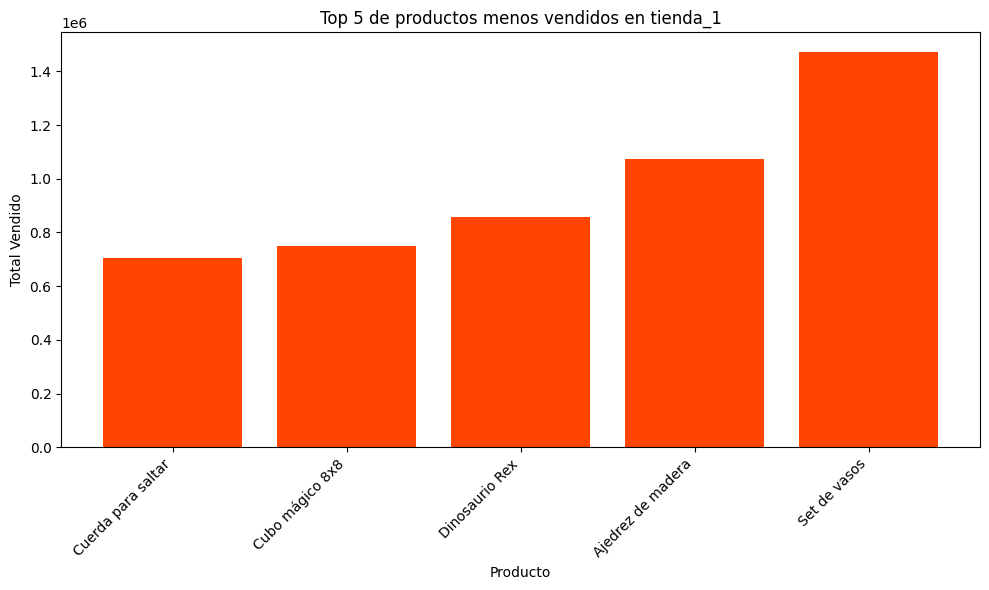





Los 5 productos menos vendidos en tienda_2:
             Producto     Precio
0     Cubo mágico 8x8   643600.0
1      Dinosaurio Rex   770300.0
2  Cuerda para saltar   856900.0
3   Ajedrez de madera  1287700.0
4        Set de vasos  1542600.0


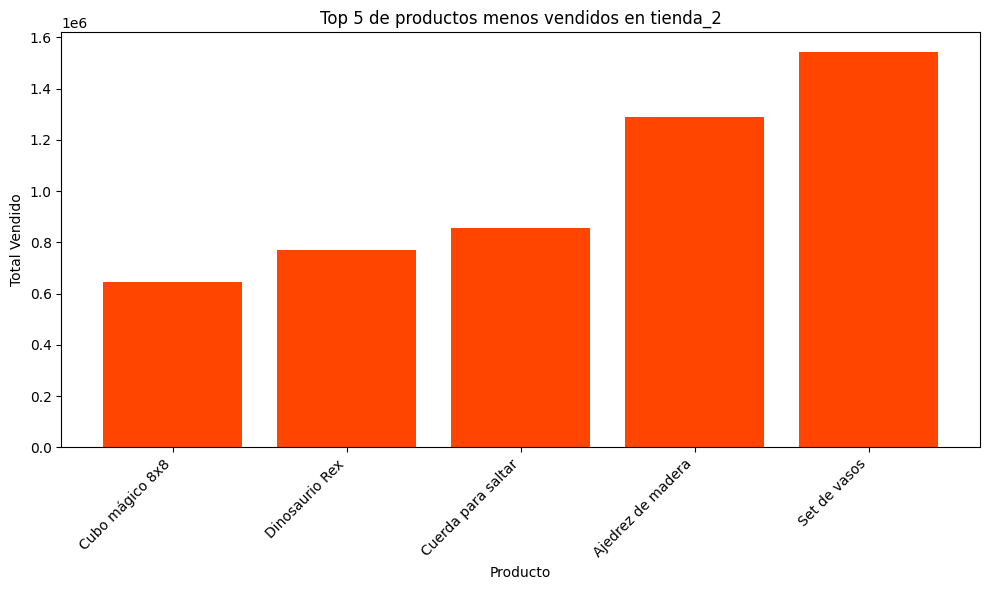





Los 5 productos menos vendidos en tienda_3:
                  Producto     Precio
0          Cubo mágico 8x8   640400.0
1           Dinosaurio Rex   795600.0
2       Cuerda para saltar   853800.0
3             Set de vasos  1210700.0
4  Bloques de construcción  1237200.0


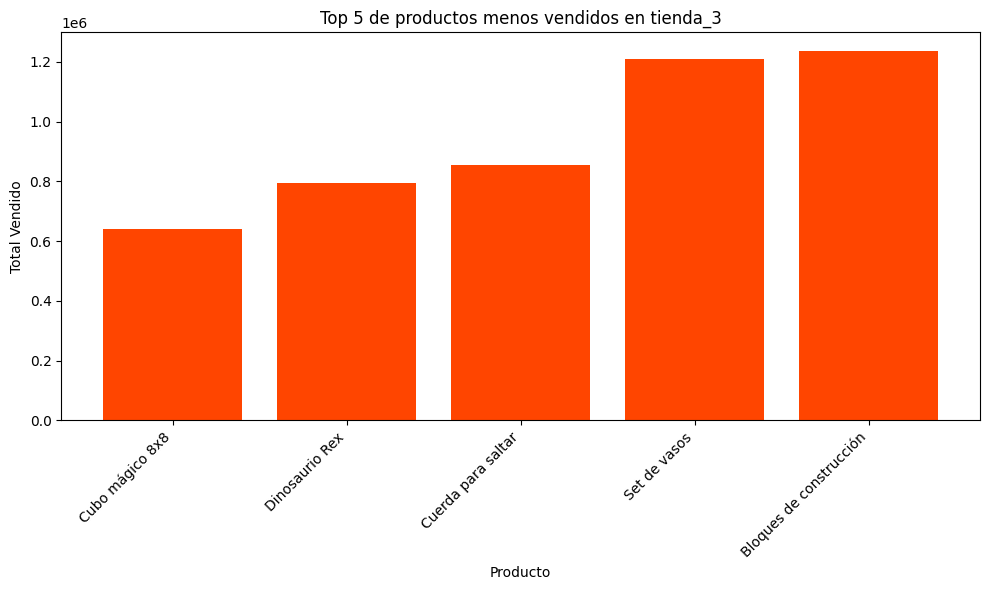





Los 5 productos menos vendidos en tienda_4:
             Producto     Precio
0  Cuerda para saltar   704800.0
1     Cubo mágico 8x8   748400.0
2      Dinosaurio Rex   858100.0
3   Ajedrez de madera  1075500.0
4        Set de vasos  1471800.0


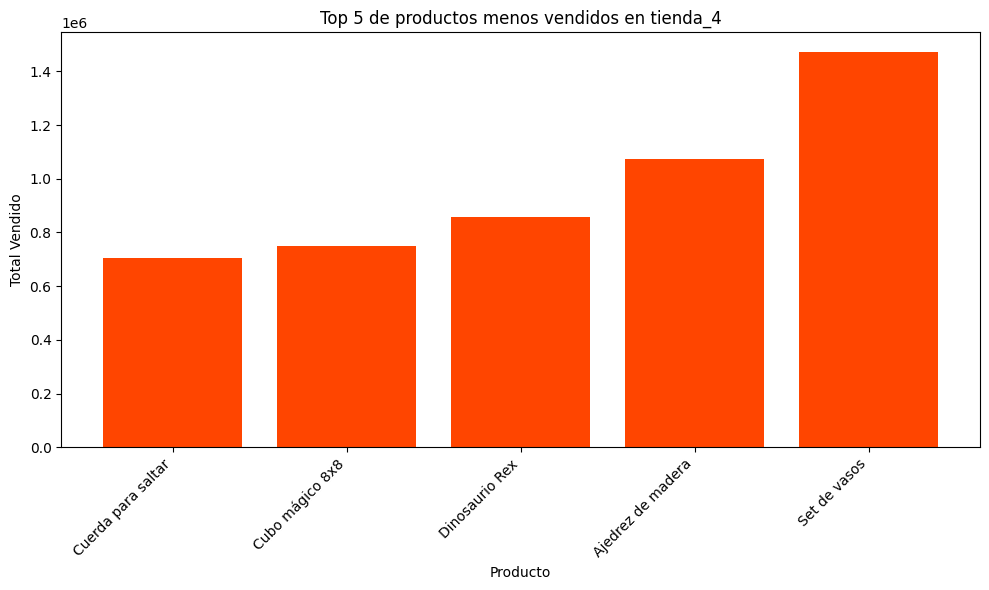

In [ ]:
# Generar tablas y gráficas de los cinco productos menos vendidos de tiendas
# Iterar sobre cada URL y encontrar los 5 productos menos vendidos
for tienda, nombre in zip([tienda, tienda2, tienda3, tienda4], ['tienda_1', 'tienda_2', 'tienda_3', 'tienda_4']):
    df = pd.read_csv(url)
    bottom_5_productos = tienda.groupby('Producto')['Precio'].sum().nsmallest(5).reset_index()
    print(f"Los 5 productos menos vendidos en {nombre}:")
    print(bottom_5_productos)
    plt.figure(figsize=(10, 6))
    plt.bar(bottom_5_productos['Producto'], bottom_5_productos['Precio'], color='orangered')
    plt.xlabel('Producto')
    plt.ylabel('Total Vendido')
    plt.title(f'Top 5 de productos menos vendidos en {nombre}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    print('\n')
    print('\n')


## Envío promedio por tienda

Las tiendas 2 y 3 tienen los gastos promedio de envío más altos.

     Tienda  Costo de Envío
1  tienda_2    25216.235693
2  tienda_3    24805.680373
0  tienda_1    23459.457167
3  tienda_4    23459.457167


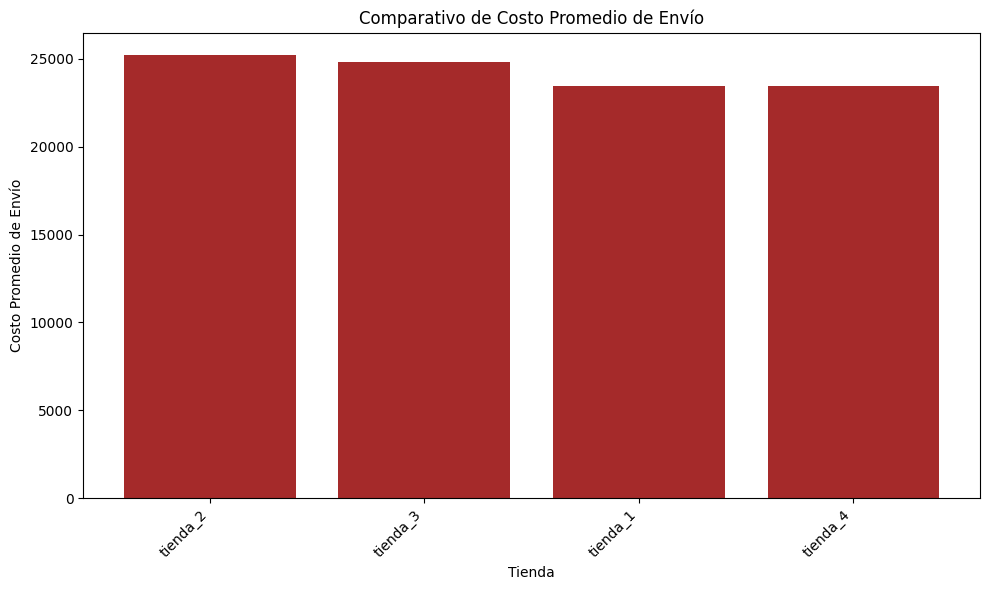

In [ ]:
# Inicializar una lista para almacenar los resultados
envios_promedio = []

# Iterar sobre cada URL y calcular la calificación promedio
for tienda, nombre in zip([tienda, tienda2, tienda3, tienda4], ['tienda_1', 'tienda_2', 'tienda_3', 'tienda_4']):
  df = pd.read_csv(url)
  envio_promedio = tienda['Costo de envío'].mean()
  envios_promedio.append({'Tienda': nombre, 'Costo de Envío': envio_promedio})

# Crear un DataFrame con los resultados
df_envios_promedio = pd.DataFrame(envios_promedio).sort_values(by='Costo de Envío', ascending=False)

print(df_envios_promedio)

# Graficar comparativo de costo de envío

plt.figure(figsize=(10, 6))
plt.bar(df_envios_promedio['Tienda'], df_envios_promedio['Costo de Envío'], color='brown')
plt.xlabel('Tienda')
plt.ylabel('Costo Promedio de Envío')
plt.title(f'Comparativo de Costo Promedio de Envío')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Porcentaje de rentabilidad de cada tienda

Con los datos anteriores podemos calcular qué tan rentable es cada tienda restando los gastos de envío de los ingresos totales y dividiéndolo entre los gastos de envío. Observamos que las tiendas menos rentables, de acuerdo con este cálculo, son la 2 y la 3, siendo esta última la menos rentable de todas.

In [ ]:
# Inicializar una lista para almacenar los resultados
resultados_rentabilidad = []

# Calcular la rentabilidad para cada tienda
for tienda, nombre in zip([tienda, tienda2, tienda3, tienda4], ['tienda_1', 'tienda_2', 'tienda_3', 'tienda_4']):
  ingresos_totales = tienda['Precio'].sum()
  gastos_envio = tienda['Costo de envío'].sum()
  rentabilidad = ((ingresos_totales - gastos_envio) / gastos_envio) * 100
  resultados_rentabilidad.append({'Tienda': nombre, 'Rentabilidad (%)': rentabilidad})

# Crear un DataFrame con los resultados
df_rentabilidad = pd.DataFrame(resultados_rentabilidad)

print(df_rentabilidad)


     Tienda  Rentabilidad (%)
0  tienda_1       1777.123111
1  tienda_2       1776.677521
2  tienda_3       1776.424126
3  tienda_4       1777.123111


## Comparación de rentabilidad, calificación y gastos de envío
En la tabla podemos observar que aunque las tiendas 2 y 3 tienen mejor calificación, son las menos rentables. Además, la tienda 3 tiene los menores gastos de envío y aún así es la menos rentable.

In [ ]:
# Crear una tabla comparativa con métricas clave
# Datos de rentabilidad
rentabilidad_data = df_rentabilidad.set_index('Tienda')['Rentabilidad (%)'].to_dict()

# Datos de envíos promedio
envios_promedio_data = df_envios_promedio.set_index('Tienda')['Costo de Envío'].to_dict()

# Datos de calificación promedio
calificacion_promedio_data = df_calificaciones_promedio.set_index('Tienda')['Calificacion Promedio'].to_dict()

# Crear un DataFrame para la tabla comparativa
data = {
    'Rentabilidad (%)': rentabilidad_data,
    'Envío Promedio': envios_promedio_data,
    'Calificación Promedio': calificacion_promedio_data
}

tabla_comparativa = pd.DataFrame(data)

tabla_comparativa


,Rentabilidad (%),Envío Promedio,Calificación Promedio
tienda_1,1777.123111,23459.457167,3.995759
tienda_2,1776.677521,25216.235693,4.037304
tienda_3,1776.424126,24805.680373,4.048326
tienda_4,1777.123111,23459.457167,3.995759


##Gráfico de dispersión de las ventas de acuerdo con datos geográficos
El gráfico muestra las zonas donde se concentran las ventas totales de las cuatro tiendas. La zona verde de mayor intensidad es donde se realizan más compras.

<ipython-input-56-547193deedd4>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df['lon'], y=df['lat'], cmap="Greens", shade=True, bw_adjust=.5)


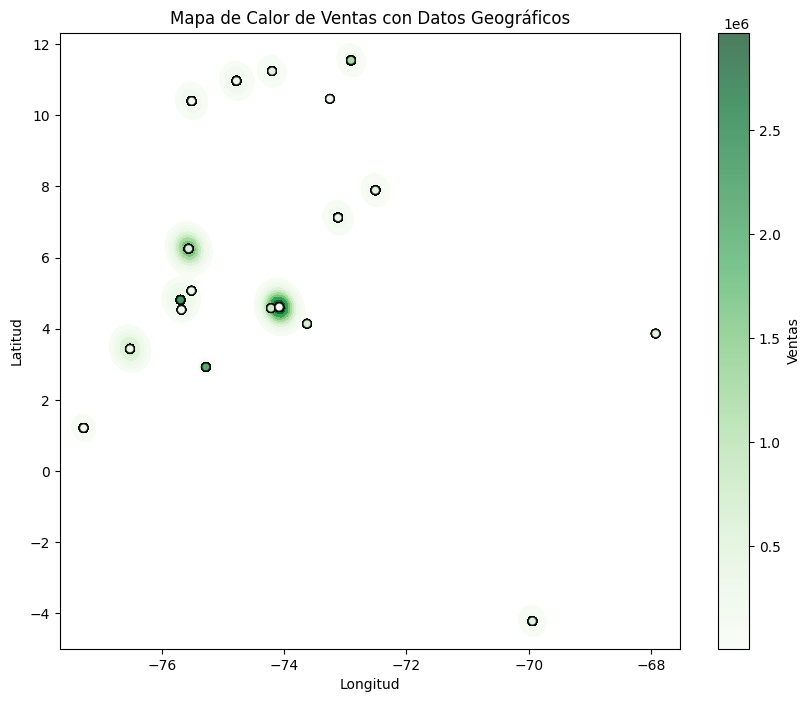

In [ ]:
import seaborn as sns
# Concatenar todos los datos en un solo DataFrame
df = pd.concat([tienda, tienda2, tienda3, tienda4])

# Crear un gráfico de dispersión con una superposición de mapa de calor
plt.figure(figsize=(10, 8))
sns.kdeplot(x=df['lon'], y=df['lat'], cmap="Greens", shade=True, bw_adjust=.5)
plt.scatter(df['lon'], df['lat'], c=df['Precio'], cmap='Greens', edgecolor='k', alpha=0.7)
plt.colorbar(label='Ventas')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Mapa de Calor de Ventas con Datos Geográficos')
plt.show()


Ya que la tienda 2 es de las menos rentables, comparemos su gráfico de ventas por datos geográficos con la de las ventas totales. Observemos que la tienda 2 tiene una alta concentración de ventas en una zona que no coincide con el gráfico de ventas totales.

In [1]:
# Crear un gráfico de dispersión con una superposición de mapa de calor para la tienda 2
plt.figure(figsize=(10, 8))
sns.kdeplot(x=tienda2['lon'], y=tienda2['lat'], cmap="Greens", shade=True, bw_adjust=.5)
plt.scatter(tienda2['lon'], tienda2['lat'], c=tienda2['Precio'], cmap='Greens', edgecolor='k', alpha=0.7)
plt.colorbar(label='Ventas')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Mapa de Calor de Ventas - Tienda 2')
plt.show()


NameError: name 'plt' is not defined

La dispersión geográfica de las ventas de la tienda 3 es más cercana a la de ventas totales.

<ipython-input-58-a59375afc67c>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=tienda3['lon'], y=tienda3['lat'], cmap="Greens", shade=True, bw_adjust=.5)


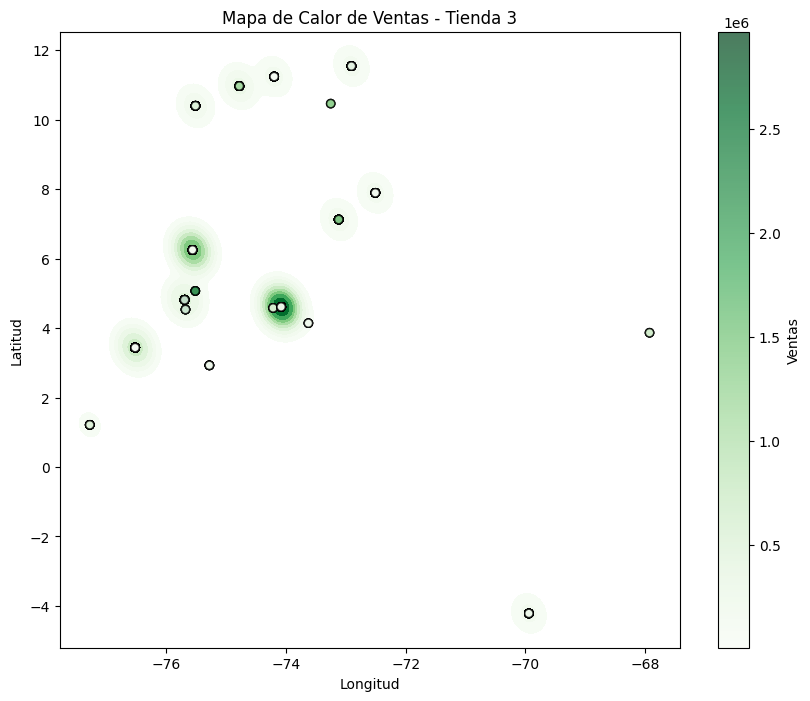

In [ ]:
# Crear un gráfico de dispersión con una superposición de mapa de calor para la tienda 3
plt.figure(figsize=(10, 8))
sns.kdeplot(x=tienda3['lon'], y=tienda3['lat'], cmap="Greens", shade=True, bw_adjust=.5)
plt.scatter(tienda3['lon'], tienda3['lat'], c=tienda3['Precio'], cmap='Greens', edgecolor='k', alpha=0.7)
plt.colorbar(label='Ventas')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Mapa de Calor de Ventas - Tienda 3')
plt.show()


#Conclusión
Para determinar qué tienda cerrar, analizamos los datos de rentabilidad, características operativas y contexto adicional:

**1. Rentabilidad (%)**
La tienda 3 registra la menor rentabilidad (1776.42%), seguida de la tienda 2, 1776.68%). Ambas están por debajo de tiendas 1 y 4.

**2. Factores clave adicionales**

*Zona geográfica:*

*   Tienda 2: Alta concentración de ventas en una zona que no coincide con las áreas de mayor demanda general, lo que podría limitar su crecimiento futuro.
*   Tienda 3: Zona geográfica similar a las tiendas más exitosas, indicando mejor alineación con la demanda.

*Diversificación de ventas:*

El porcentaje de ventas del top 5 de productos es más alto en la tienda 2 (39.61%) que en la tienda 3 (39.43%), sugiriendo mayor dependencia de pocos productos.

3. Otros indicadores

*   Envío promedio: Tienda 2 tiene el costo más alto (25216.24), mientras tienda 3 está en 24805.68.

*   Calificación promedio: Ambas tiendas superan ligeramente a 1 y 4.

4. Recomendación

Aunque la tienda 3 es técnicamente la menos rentable, su ubicación estratégica y mejor diversificación de productos la hacen más sostenible a largo plazo.
Por otro lado, la tienda 2 combina una rentabilidad casi igual de baja, riesgo geográfico significativo y mayor concentración de ventas.
Por lo tanto, la recomendación es cerrar la tienda 2 sería, si se prioriza estabilidad futura sobre una diferencia mínima en rentabilidad actual.